# <span style = "color: gray"> Airline Passenger Satisfaction Prediction </span>

***

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

## <span style = "color : blue"> Content </span>

* Gender: Gender of the passengers (Female, Male)

* Customer Type: The customer type (Loyal customer, disloyal customer)

* Age: The actual age of the passengers

* Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

* Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

* Flight distance: The flight distance of this journey

* Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

* Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

* Ease of Online booking: Satisfaction level of online booking

* Gate location: Satisfaction level of Gate location

* Food and drink: Satisfaction level of Food and drink

* Online boarding: Satisfaction level of online boarding

* Seat comfort: Satisfaction level of Seat comfort

* Inflight entertainment: Satisfaction level of inflight entertainment

* On-board service: Satisfaction level of On-board service

* Leg room service: Satisfaction level of Leg room service

* Baggage handling: Satisfaction level of baggage handling

* Check-in service: Satisfaction level of Check-in service

* Inflight service: Satisfaction level of inflight service

* Cleanliness: Satisfaction level of Cleanliness

* Departure Delay in Minutes: Minutes delayed when departure

* Arrival Delay in Minutes: Minutes delayed when Arrival

* Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

## Let's dive into it

### Import necessary libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'airline_passenger_satisfaction.csv' dataset and store it in a DataFrame

In [48]:
df=pd.read_csv('airline_passenger_satisfaction.csv')

### View the top 5 rows

In [49]:
pd.set_option('display.max_columns', None)

In [50]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


### Find info of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

### Find basic statistical information about the dataset

In [6]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Check for any null values

In [7]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

### Fill missing value with mean

In [51]:
df1=df.fillna(int(df['Arrival Delay in Minutes'].mean()), inplace=True)
df1

In [52]:
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

### View unique values in all categorical columns

In [18]:
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel','Class', 'satisfaction']

In [28]:
for i in categorical_columns:
    n=df[i].unique()
    print("Unique values in ", i , "are : ", n)

Unique values in  Gender are :  ['Male' 'Female']
Unique values in  Customer Type are :  ['Loyal Customer' 'disloyal Customer']
Unique values in  Type of Travel are :  ['Personal Travel' 'Business travel']
Unique values in  Class are :  ['Eco Plus' 'Business' 'Eco']
Unique values in  satisfaction are :  ['neutral or dissatisfied' 'satisfied']


### Change values in satisfaction to:
* Neutral to 1
* Dissatisfied to 0
* Satisfied to 1


In [53]:
def satisfied(x):
    if x == 'neutral or dissatisfied':
        return 0
    else:
        return 1

In [54]:
df['satisfaction']=df['satisfaction'].apply(satisfied)

In [55]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [130]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [32]:
df['satisfaction'].unique()

array([0, 1], dtype=int64)

### Drop Unnamed: 0 and id column

In [33]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [56]:
del df['Unnamed: 0']
del df['id']

In [57]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


### Change the rest of the categorical data into nominal using OneHotEncoding

In [61]:
df1=pd.get_dummies(df, drop_first=True)
#pd.set_option('display.max_columns', None)

In [63]:
df1

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,1,0,1,0,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0,0,1,0,1,0
103900,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1,1,0,0,0,0
103901,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0,1,1,0,0,0
103902,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0,0,1,0,1,0


In [60]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,0


# <span style = "color : red"> Visualization </span>

### Plot a pairplot of the dataset

In [ ]:
sns.pairplot(df)
plt.show()

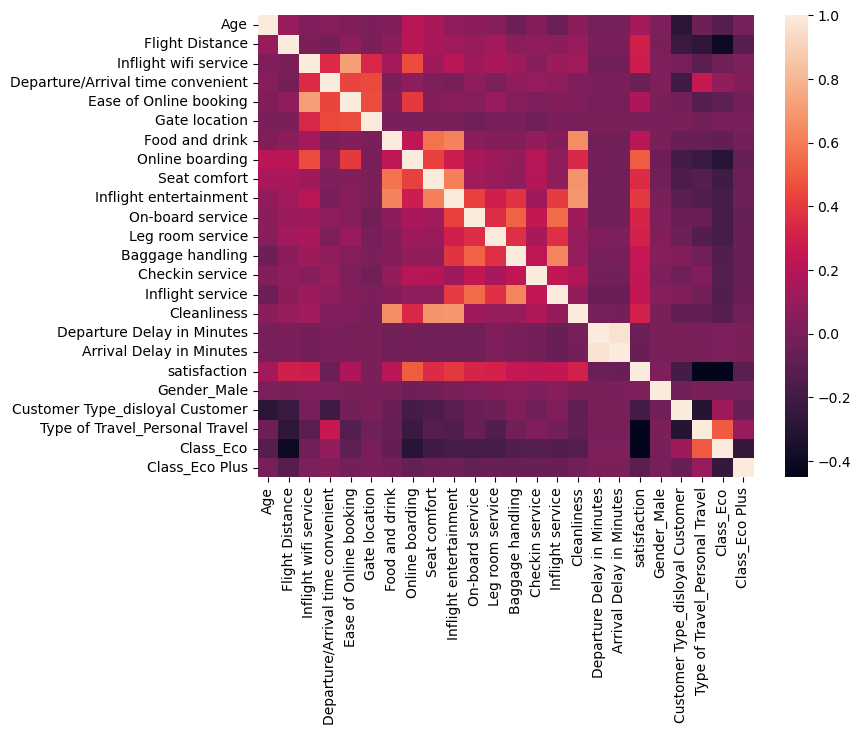

In [83]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr())
plt.show()

### Plot a countplot of Type of travel

In [45]:
df.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

<Axes: xlabel='Type of Travel', ylabel='count'>

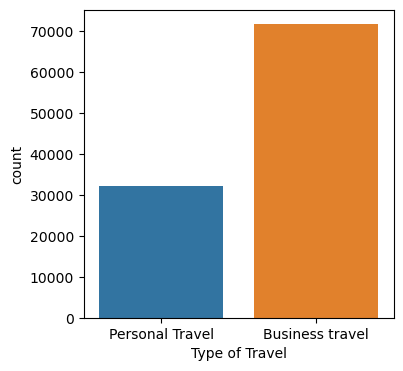

In [75]:
Type_of_travel=['Type of Travel_Personal Travel', 'Type of Travel_Business Travel']
plt.figure(figsize=(4,4))
sns.countplot(x='Type of Travel', data=df)

### Plot a countplot of Customer Type

<Axes: xlabel='Customer Type', ylabel='count'>

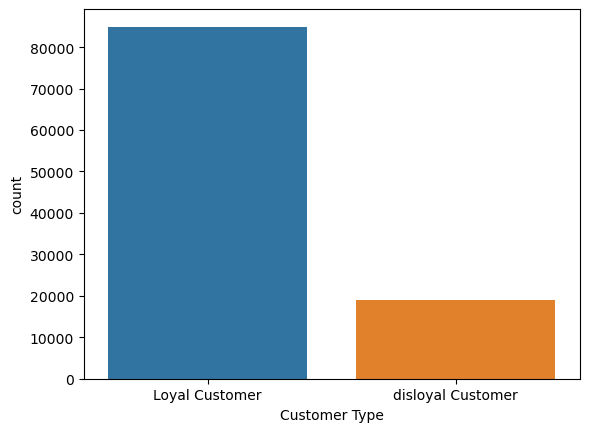

In [79]:
Customer_type=['Loyal Customer', 'Disloyal Customer']
sns.countplot(x='Customer Type', data=df)

### Split the columns into input and target variables

In [81]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [90]:
X =  df1.drop(columns = ['satisfaction'])
y = df1['satisfaction']

### Standardise the data using StandardScaler

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler=StandardScaler()

In [93]:
xcolumns=X.columns

In [94]:
X = scaler.fit_transform(X)

In [95]:
X = pd.DataFrame(X, columns = xcolumns)

In [96]:
X.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,1.156436,1.305870,0.266393,0.073028,1.015031,-0.472767,1.490614,-0.904327,3.586776
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.25338,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.237525,1.015031,2.115208,-0.670865,-0.904327,-0.278802
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,0.479403,-0.26684,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.392802,-0.985192,-0.472767,-0.670865,-0.904327,-0.278802
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.25338,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.159887,-0.985192,-0.472767,-0.670865,-0.904327,-0.278802
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.49327,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.392802,1.015031,-0.472767,-0.670865,-0.904327,-0.278802


### Split the dataset into training and testing set

In [97]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

### Check the shape of X_train and X_test

In [102]:
X_train.shape

(83123, 23)

In [104]:
X_test.shape

(20781, 23)

### Create Random Forest model

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
model = RandomForestClassifier(n_estimators= 100)

### Train the model with X_train and y_train

In [107]:
model.fit(X_train, y_train)

RandomForestClassifier()

### Check the score of our trained model

In [110]:
model.score(X_train, y_train)

1.0

### Make predictions with X_test

In [111]:
y_pred = model.predict(X_test)

### Check the acccuracy score of our prediction

In [112]:
from sklearn import metrics

In [113]:
metrics.accuracy_score(y_test, y_pred)

0.9610220874837592

### Create a confusion matrix

In [114]:
metrics.confusion_matrix(y_test, y_pred)

array([[11552,   247],
       [  563,  8419]], dtype=int64)

### Plot confusion matrix on heatmap

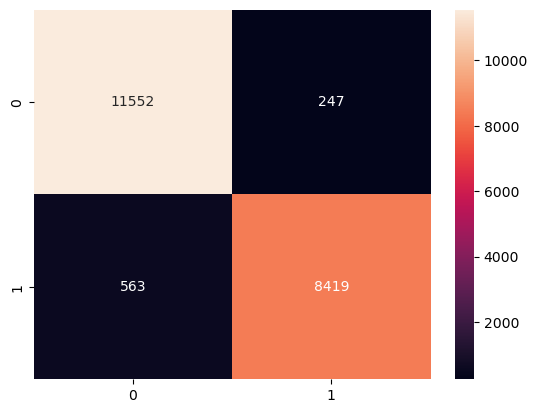

In [115]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True, fmt = 'd')
plt.show()

### Create classification report

In [116]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11799
           1       0.97      0.94      0.95      8982

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



***